In [3]:
#- - - - - - - - - - - - - - -  Import required modules/packages/dependencies- - - - - - - - - - - - - - - - - - - - - _
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import cartopy
import geopandas as gpd
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import folium
import ipywidgets
from IPython.display import HTML, display
import numpy as np

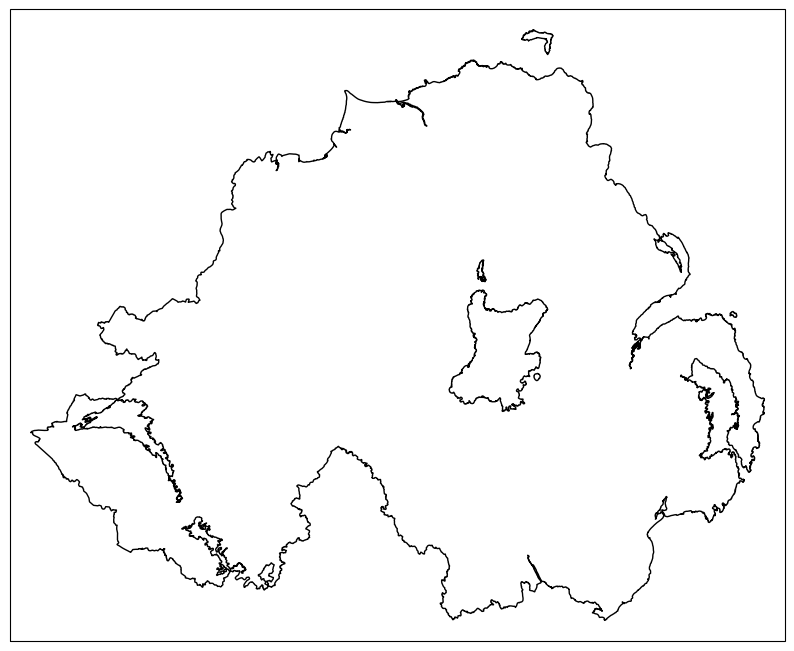

In [16]:
#- - - - - - - - - - - - - - -  Initial Map SetUp- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -- - - -
 
# make the plotting interactive
plt.ion()

# create the applicable CRS -in this case- Universal Transverse Mercator reference system- to transform the data
myCRS = ccrs.UTM(29) 

# create a figure of size 10x10 (representing the page size in inches)
myFig = plt.figure(figsize=(10, 10)) 

# create an axes object in the figure (within which the data shall be plotted), using the predefined crs
ax = plt.axes(projection=myCRS)  

# first, we just add the outline of Northern Ireland using cartopy's ShapelyFeature
outline= gpd.read_file(os.path.abspath('c:/Carol_PG_CERT_GIS/egm722_Practicals/egm722/week2/data_files/NI_outline.shp'))
outline.to_crs(epsg=2157)
outline_feature = ShapelyFeature(outline['geometry'], myCRS, edgecolor='k', facecolor='w')
xmin, ymin, xmax, ymax = outline.total_bounds
ax.add_feature(outline_feature) # add the features we've created to the map.
myFig

#load in dataset, to be used to set the map extent, then get this gdf's bounds and set them against the axes extent 
outline = gpd.read_file(os.path.abspath('c:/Carol_PG_CERT_GIS/egm722_Practicals/egm722/week2/data_files/NI_outline.shp'))                      
xmin, ymin, xmax, ymax = outline.total_bounds
ax.set_extent([xmin-5000, xmax+5000, ymin-5000, ymax+5000], crs=myCRS)  # reordering co-ords as set_extent because total_bounds  
                                                                        # gives output as xmin, ymin, xmax, ymax and set_extent 
                                                                        # needs this order: xmin, xmax, ymin, ymax

In [17]:
#- - - - - - - - - - - - - - -  Add initial data- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -- - - -

# load the necessary data here 

towns = gpd.read_file(os.path.abspath('c:/Carol_PG_CERT_GIS/egm722_Practicals/egm722/week2/data_files/Towns.shp'))
towns.to_crs(epsg=2157)
AgFields = gpd.read_file(os.path.abspath('c:/Carol_PG_CERT_GIS/EGM722_Project/data_files/AgFields.shp'))
AgFields.to_crs(epsg=2157)
ASSI = gpd.read_file(os.path.abspath('c:/Carol_PG_CERT_GIS/EGM722_Project//data_files/ASSI.shp'))
ASSI.to_crs(epsg=2157)
water = gpd.read_file(os.path.abspath('c:/Carol_PG_CERT_GIS/egm722_Practicals/egm722/week2/data_files/Water.shp'))
water.to_crs(epsg=2157)
print(type(water))
print(type(AgFields))
AgFields.columns

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


Index(['FieldID', 'X_COORD', 'Y_COORD', 'Hectares', 'BusnID', 'geometry'], dtype='object')

In [18]:
ax.plot(towns.geometry.x, towns.geometry.y, 's', color='0.25', ms=6, transform=myCRS)

In [19]:
AgFields.columns

Index(['FieldID', 'X_COORD', 'Y_COORD', 'Hectares', 'BusnID', 'geometry'], dtype='object')

In [21]:
AgFields = ShapelyFeature(AgFields['geometry'], # first argument is the geometry
                            myCRS, # second argument is the CRS
                            edgecolor='lightblue', # set the edgecolor to be mediumblue
                            facecolor='lightblue', # set the facecolor to be mediumblue
                            linewidth=1) # set the outline width to be 1 pt
ax.add_feature(AgFields) # add the collection of features to the map

    
myFig # to show the updated figure

TypeError: 'ShapelyFeature' object is not subscriptable

In [ ]:
# generate matplotlib handles to create a legend of features in output map
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles

# here, we're setting the edge color to be the same as the face color. Feel free to change this around,
# and experiment with different line widths.
#water_feat = ShapelyFeature(water['geometry'],  # first argument is the geometry
                            #myCRS,  # second argument is the CRS
                            #edgecolor='mediumblue',  # set the edgecolor to be mediumblue
                            #facecolor='mediumblue',  # set the facecolor to be mediumblue
                            #linewidth=1)  # set the outline width to be 1 pt
#ax.add_feature(water_feat)  # add the collection of features to the map


Fcensus_feat = ShapelyFeature(farmCensusDEA['geometry'],  # first argument is the geometry
                            myCRS,  # second argument is the CRS
                            edgecolor='mediumblue',  # set the edgecolor to be mediumblue
                            facecolor='mediumblue',  # set the facecolor to be mediumblue
                            linewidth=1)  # set the outline width to be 1 pt




#lakes




river_feat = ShapelyFeature(rivers['geometry'],  # first argument is the geometry
                            myCRS,  # second argument is the CRS
                            edgecolor='royalblue',  # set the edgecolor to be royalblue
                            linewidth=0.2)  # set the linewidth to be 0.2 pt
ax.add_feature(river_feat)  # add the collection of features to the map

# ShapelyFeature creates a polygon, so for point data we can just use ax.plot()
town_handle = ax.plot(towns.geometry.x, towns.geometry.y, 's', color='0.5', ms=6, transform=myCRS)

# generate a list of handles for the county datasets
#lake_handles = generate_handles(lakes.name.unique(), lake_colors, alpha=0.25)

# note: if you change the color you use to display lakes, you'll want to change it here, too
water_handle = generate_handles(['Water'], ['mediumblue'])

# note: if you change the color you use to display rivers, you'll want to change it here, too
river_handle = [mlines.Line2D([], [], color='royalblue')]  # have to make this a list

# update county_names to take it out of uppercase text
#nice_names = [name.title() for name in county_names]

# ax.legend() takes a list of handles and a list of labels corresponding to the objects you want to add to the legend
#for handeles- might want to add in county_handles in future: " = county_handles + water_handle + river_handle + town_handle "
handles = water_handle + river_handle + town_handle
#for labels- might want to add in nice names in fure -use "nice_names + ['Water', 'Rivers', 'Towns'] "
labels = ['Water', 'Rivers', 'Towns']

leg = ax.legend(handles, labels, title='Legend', title_fontsize=12,
                fontsize=10, loc='upper left', frameon=True, framealpha=1)

gridlines = ax.gridlines(draw_labels=True,  # draw  labels for the grid lines
                         xlocs=[-8, -7.5, -7, -6.5, -6, -5.5],  # add longitude lines at 0.5 deg intervals
                         ylocs=[54, 54.5, 55, 55.5])  # add latitude lines at 0.5 deg intervals
gridlines.left_labels = False  # turn off the left-side labels
gridlines.bottom_labels = False  # turn off the bottom labels

# add the text labels for the towns
for ind, row in towns.iterrows():  # towns.iterrows() returns the index and row
    x, y = row.geometry.x, row.geometry.y  # get the x,y location for each town
    ax.text(x, y, row['TOWN_NAME'].title(), fontsize=8, transform=myCRS)  # use plt.text to place a label at x,y

    
#-----------------------------add a scale bar :--------------------------------------------------------------------------
def scale_bar(ax, location=(0.92, 0.95)):
    x0, x1, y0, y1 = ax.get_extent()
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    ax.plot([sbx, sbx - 10000], [sby, sby], color='k', linewidth=7, transform=ax.projection)
    ax.plot([sbx, sbx - 5000], [sby, sby], color='k', linewidth=6, transform=ax.projection)
    ax.plot([sbx-5000, sbx - 10000], [sby, sby], color='w', linewidth=6, transform=ax.projection)
    ax.plot([sbx-9000, sbx - 10000], [sby, sby], color='k', linewidth=6, transform=ax.projection)

    ax.text(sbx, sby-4500, '10 km', transform=ax.projection, fontsize=6)
    ax.text(sbx-4250, sby-4500, '5', transform=ax.projection, fontsize=6)#should be 6250 but doesn't place well
    ax.text(sbx-9750, sby-4500, '1', transform=ax.projection, fontsize=6)# should be 11250 but doesn't place well
    ax.text(sbx-12500, sby-4500, '0', transform=ax.projection, fontsize=6)
    #ax.text(sbx-24500, sby-4500, '0 km', transform=ax.projection, fontsize=6)

    
    
# add the scale bar to the axis
scale_bar(ax)

# save the figure as map_ipythonTest.png, cropped to the axis (bbox_inches='tight'), and a dpi of 300
myFig.savefig('map_ipythoTest.png', bbox_inches='tight', dpi=300)

myFig



In [ ]:
print(counties.crs == wards.crs) 

In [ ]:
# make sure in same crs or analysis

counties = counties.to_crs(epsg=2157)
wards = wards.to_crs(epsg=2157)
print(counties.crs == wards.crs) 
type(wards)

In [ ]:


#- - - - - - - - - - - - - - -  Carry out spatial analyses- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
#oneKmBuffer = bike_station_locations.geometry.buffer(1)
#oneKmBuffer.head()
#print(oneKmBuffer.head())
#for index, row in bike_station_locations.iterrows():



#TODO: define and code for further analyses



# your analysis goes here...counties have been removed

join = gpd.sjoin(counties, wards, how='inner', lsuffix='left', rsuffix='right') # perform the spatial join of counties and wards
joinedData = join.groupby(['CountyName'])['Population'].sum() # assign summary data to variable to be printed
print(joinedData)
# below here, you may need to modify the script somewhat to create your map.






# to make a nice colorbar that stays in line with our map, use these lines:
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)


# plot the ward data into our axis, using
ward_plot = wards.plot(column='Population', ax=ax, vmin=1000, vmax=8000, cmap='viridis',
                       legend=True, cax=cax, legend_kwds={'label': 'Resident Population'})


county_outlines = ShapelyFeature(counties['geometry'], myCRS, edgecolor='r', facecolor='none')


ax.add_feature(county_outlines)
county_handles = [mpatches.Rectangle((0, 0), 1, 1, facecolor='none', edgecolor='r')]

ax.legend(county_handles, ['County Boundaries'], fontsize=12, loc='upper left', framealpha=1)

# save the figure
myFig.savefig('sample_map22.png', dpi=300, bbox_inches='tight')

myFig


#- - - - - - - - - - - - - - -  Present results from analysis- - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
#TODO: present results


#- - - - - - - - - - - - - - - Output the final map- - - - - - - - - - - - - - -

# add gridlines below
gridlines = ax.gridlines(draw_labels=True,
                         xlocs=[-8, -7.5, -7, -6.5, -6, -5.5],
                         ylocs=[54, 54.5, 55, 55.5],
                         linewidth = 0.5, color = 'gray', alpha = 0.5, linestyle='--')

gridlines.right_labels = False
gridlines.bottom_labels = False
gridlines.left_labels = True
gridlines.top_labels = True

In [ ]:
#add background features to map (for aesthetic purposes only) 
#ax.add_feature(cartopy.feature.OCEAN)
#ax.add_feature(cartopy.feature.LAND)
#ax.add_feature(cartopy.feature.BORDERS)